<div style="text-align: center; font-family: 'charter bt pro roman'; color: #033280;">
  <h1 style="margin-bottom: 10px;">Sentiment Analysis of the Peruvian Fiscal Council's Discipline Using Zero-Shot Learning</h1>
  <div style="height: 2px; width: 90%; margin: 0 auto; background-color: #033280;"></div>
</div>

<div style="text-align: center; font-family: 'charter bt pro roman'; color: #033280;">
  <h2>Documentation</h2>
  <div style="margin-top: 10px;">

<div style="text-align: center; margin-right: 40px;">
  <span style="display: inline-block; margin-right: 10px;">
    <a href="https://github.com/JasonCruz18" target="_blank">
      <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/github/github-original.svg" alt="GitHub" style="width: 24px;">
    </a>
  </span>
  <span style="display: inline-block;">
    <a href="mailto:jj.cruza@up.edu.pe">
      <img src="https://upload.wikimedia.org/wikipedia/commons/4/4e/Mail_%28iOS%29.svg" alt="Email" style="width: 24px;">
    </a>
  </span>
</div>


<div style="font-family: 'PT Serif Pro Book'; text-align: left; color: #1a1a1a; font-size: 16px; line-height: 1.6;">
  This <b style="color: #cd301b;">Jupyter Notebook</b> documents the complete workflow for conducting a <b>sentiment analysis</b> as part of the research project <b>"Advertencias ignoradas: El necesario retorno a la prudencia fiscal en el Perú"</b>.

The notebook is divided into two major sections. The first section focuses on <i>text preprocessing</i> of official <b>announcements</b> and <b>reports</b> from the Peruvian Fiscal Council (Consejo Fiscal, CF), which are publicly available as PDF files on their 
  <a href="https://cf.gob.pe/p/documentos/comunicados/" style="color: #cd301b;">official website</a>. This section includes the extraction of raw data and metadata, the segmentation of documents into paragraphs, and the removal of textual noise — all crucial steps to prepare the data for sentiment classification.

The second section applies a <b>zero-shot learning approach</b> using the <code>xlm-roberta-base</code> model from Hugging Face's Transformers library. This allows us to evaluate the sentiment of each paragraph based on custom-defined fiscal labels, without requiring any fine-tuning on labeled training data. The process includes defining the set of sentiment labels, feeding the model with each paragraph, and aggregating the results by document or publication to assess the overall tone of fiscal communication.

The goal is to provide a rigorous and reproducible methodology for analyzing the <b>disciplinary tone</b> expressed by the Fiscal Council — an independent institution — in its published content, contributing to the broader understanding of Peru’s fiscal credibility and oversight.
</div>


<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;line-height: 1.5;">
<span style="font-size: 24px;">&#128196;</span> This icon refers <i>Announcement</i> or <i>Report</i> (<i>A/R</i>) of the CF.
    <br>
    <span style="font-size: 24px;">&#8987;</span> A/R available since <b>2016-</b>. 
    <br>
</div>

<div style="font-family: Amaya; text-align: left; color: #033280; font-size:16px">The following <b>outline is functional</b>. By utilising the provided buttons, users are able to enhance their experience by browsing this script.<div/>

<div id="outilne"; style="background-color: #292929; padding: 10px; line-height: 1.5; font-family: 'PT Serif Pro Book';">
    <h2 style="text-align: left; color: #E0E0E0;">
        Outline
    </h2>
    <br>
    <a href="#libraries" style="color: #E0E0E0; font-size: 18px; margin-left: 0px;">
        Libraries</a>
    <br>
    <a href="#setup" style="color: #E0E0E0; font-size: 18px; margin-left: 0px;">
        Initial set-up</a>
    <br>
    <a href="#1" style="color: #E0E0E0; font-size: 18px; margin-left: 0px;">
        1. Preprocessing text</a>
    <br>
    <a href="#1-1" style="color: #ff8575; font-size: 16px; margin-left: 20px;">
        1.1 Raw data</a>
    <br>
    <a href="#1-2" style="color: #ff8575; font-size: 16px; margin-left: 20px;">
        1.2 Metadata</a>
    <br>
    <a href="#1-3" style="color: #ff8575; font-size: 16px; margin-left: 20px;">
        1.3 Split into paragraphs</a>
    <br>
    <a href="#1-4" style="color: #ff8575; font-size: 16px; margin-left: 20px;">
        1.4 Noise reduction</a>
    <br>
    <a href="#2" style="color: #E0E0E0; font-size: 18px; margin-left: 0px;">
        2. Sentiment analysis by zero-shot</a>
     <br>
    <a href="#2-1" style="color: #ff8575; font-size: 16px; margin-left: 20px;">
        2.1 Define the model (<code>xlm-roberta-base</code>)</a>
    <br>
    <a href="#2-2" style="color: #ff8575; font-size: 16px; margin-left: 20px;">
        2.2 Define the labels</a>
    <br>
    <a href="#2-3" style="color: #ff8575; font-size: 16px; margin-left: 20px;">
        2.3 Applying the model to the paragraphs</a>
    <br>
    <a href="#2-4" style="color: #ff8575; font-size: 16px; margin-left: 20px;">
        2.4 Sentiment aggregation by announcement</a>
</div>

<div style="text-align: left; font-family: 'PT Serif Pro Book'; color: dark; font-size:16px">
    Any questions or issues regarding the coding, please email Jason Cruz <a href="mailto:jj.cruza@alum.up.edu.pe" style="color: rgb(0, 153, 123); text-decoration: none;"><span style="font-size: 24px;">&#x2709;</span>
    </a>.
    <div/>

<div id="libraries"; style="background-color: #292929; padding: 10px; line-height: 1.5; font-family: 'PT Serif Pro Book';">
    <h1 style="text-align: left; color: #E0E0E0;">
        Libraries
    </h1>
</div>

In [2]:
from openai import OpenAI
import numpy as np
import pandas as pd
from py_markdown_table.markdown_table import markdown_table

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    <span style="font-size: 30px; color: rgb(255, 32, 78); font-weight: bold;">
        <a href="#outilne" style="color: rgb(0, 153, 123); text-decoration: none;">&#11180;</a>
    </span> 
    <a href="#outilne" style="color: rgb(0, 153, 123); text-decoration: none;">Back to the outline.</a>
</div>

<div id="setup"; style="background-color: #292929; padding: 10px; line-height: 1.5; font-family: 'PT Serif Pro Book';">
    <h1 style="text-align: left; color: #E0E0E0;">
        Initial set-up
    </h1>
</div>

<div style="text-align: left; font-family: 'PT Serif Pro Book'; color: dark; font-size:16px">
    Check your Python version.
    <div/>

In [3]:
!python --version

Python 3.12.11


<div style="text-align: left; font-family: 'PT Serif Pro Book'; color: dark; font-size:16px">
    If you don't have the libraries below, please use the following code (as example) to install the required libraries. The following code lines will install all the dependences
    <div/>

In [4]:
!pip install numpy pandas openai tiktoken py_markdown_table pdfplumber --quiet && !pip install pymupdf nltk pandas --quiet > nul 2>&1

In [5]:
!pip install matplotlib --quiet > nul 2>&1

In [6]:
!pip install seaborn --quiet > nul 2>&1

In [1]:
pip install pytesseract pdf2image pillow --quiet > nul 2>&1

Note: you may need to restart the kernel to use updated packages.


<div style="font-family: PT Serif Pro Book; text-align: left; color:dark; font-size:16px"> The following code lines will allow us to display the entire dataframes. <div/>

In [7]:
# Evitar que pandas trunque el texto al mostrarlo
pd.set_option('display.max_colwidth', None)

In [8]:
# Evitar que pandas trunque el texto al mostrarlo
pd.set_option('display.max_row', None)

<p style="font-family: PT Serif Pro Book; text-align: left; color:dark; font-size:16px"> The following function will establish a connection to the <code>cf_mef_datasets</code> database in <code>PostgreSQL</code>. The <b>input data</b> used in this jupyter notebook will be loaded from this <code>PostgreSQL</code> database, and similarly, all <b>output data</b> generated by this jupyter notebook will be stored in that database. Ensure that you set the necessary parameters to access the server once you have obtained the required permissions.<p/>
    
<p style="text-align: left; font-family: 'PT Serif Pro Book'; color: dark; font-size:16px">
To request permissions, please email Jason Cruz <a href="mailto:jj.cruza@alum.up.edu.pe" style="color: #cd301b; text-decoration: none;"> <span style="font-size: 24px;">&#x2709;</span>
    </a>.
<p/>

<div style="text-align: left; font-family: 'PT Serif Pro Book'; color: dark; font-size:16px">
    <span style="font-size: 24px; color: #FFA823; font-weight: bold;">&#9888;</span>
    Enter your user credentials to acces to SQL.
    <div/>

In [ ]:
def create_sqlalchemy_engine():
    """
    Function to create an SQLAlchemy engine using environment variables.
    
    Returns:
        engine: SQLAlchemy engine object.
    """
    # Get environment variables
    user = os.environ.get('CIUP_SQL_USER')  # Get the SQL user from environment variables
    password = os.environ.get('CIUP_SQL_PASS')  # Get the SQL password from environment variables
    host = os.environ.get('CIUP_SQL_HOST')  # Get the SQL host from environment variables
    port = 5432  # Set the SQL port to 5432
    database = 'gdp_revisions_datasets'  # Set the database name 'gdp_revisions_datasets' from SQL

    # Check if all environment variables are defined
    if not all([host, user, password]):
        raise ValueError("Some environment variables are missing (CIUP_SQL_HOST, CIUP_SQL_USER, CIUP_SQL_PASS)")

    # Create connection string
    connection_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"

    # Create SQLAlchemy engine
    engine = create_engine(connection_string)
    
    return engine

<div style="text-align: left;">
    <span style="font-size: 24px; color: rgb(255, 32, 78); font-weight: bold;">&#9888;</span>
    <span style="font-family: PT Serif Pro Book; color: black; font-size: 16px;">
        Import all other functions required by this jupyter notebook.
    </span>
</div>

<div style="font-family: PT Serif Pro Book; text-align: left; color:dark; font-size:16px"> Please, check the script <code>cf_mef_functions.py</code> which contains all the functions required by this jupyter notebook. The functions there are ordered according to the <a href="#outilne" style="color: #033280;">sections</a> of this jupyter notebok.<div/>

In [6]:
#from cf_mef_functions.py import * 

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    <span style="font-size: 30px; color: #033280; font-weight: bold;">
        <a href="#outilne" style="color: #033280; text-decoration: none;">&#11180;</a>
    </span> 
    <a href="#outilne" style="color: #cd301b; text-decoration: none;">Back to the outline.</a>
</div>

<div id="1"; style="background-color: #292929; padding: 10px; line-height: 1.5; font-family: 'PT Serif Pro Book';">
    <h1 style="text-align: left; color: #E0E0E0;">
        1. Preprocessing text
    </h1>
</div>

In [9]:
import re
import pandas as pd
import pdfplumber
import os
import fitz  # PyMuPDF
from datetime import datetime

In [11]:
import os
from pdf2image import convert_from_path
import pytesseract

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    <span style="font-size: 30px; color: #033280; font-weight: bold;">
        <a href="#outilne" style="color: #033280; text-decoration: none;">&#11180;</a>
    </span> 
    <a href="#outilne" style="color: #cd301b; text-decoration: none;">Back to the outline.</a>
</div>

# OCR

In [12]:
# Ruta al ejecutable de Tesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"  # Cambia si es necesario

In [13]:
def extract_text_from_scanned_pdf(pdf_path):
    images = convert_from_path(pdf_path, dpi=300)
    all_text = ""
    for img in images:
        text = pytesseract.image_to_string(img, lang='spa')  # Usa 'eng' para inglés, 'spa' para español
        all_text += text + "\n"
    return all_text

In [14]:
def extract_text_from_scanned_pdf(pdf_path):
    images = convert_from_path(pdf_path, dpi=300)
    all_text = ""
    for img in images:
        text = pytesseract.image_to_string(img, lang='spa')  # Usa 'eng' para inglés, 'spa' para español
        all_text += text + "\n"
    return all_text


In [15]:
# Ejemplo de uso
folder = r"C:\Users\Jason Cruz\OneDrive\Documentos\RA\CIUP\Policy Brief\CF\Informes\Cumplimiento de las reglas fiscales\scanned"
for file in os.listdir(folder):
    if file.endswith(".pdf"):
        full_path = os.path.join(folder, file)
        text = extract_text_from_scanned_pdf(full_path)
        print(f"Contenido de {file}:\n", text[:500])  # Muestra los primeros caracteres

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2313787750.py, line 2)

In [16]:
# Ruta al ejecutable de Tesseract (ajusta según tu instalación)
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"  # ← Ajusta esta línea

def extract_raw_text_from_scanned_pdfs(folder_path, dpi=300, lang='spa'):
    """
    Extrae texto de PDFs escaneados usando OCR.

    Args:
        folder_path (str): Ruta a la carpeta con los archivos PDF.
        dpi (int): Resolución de las imágenes extraídas del PDF.
        lang (str): Idioma para el OCR ('spa' para español, 'eng' para inglés, etc.)

    Returns:
        pd.DataFrame: DataFrame con columnas ['filename', 'raw_text']
    """
    records = []

    for file in os.listdir(folder_path):
        if file.lower().endswith(".pdf"):
            pdf_path = os.path.join(folder_path, file)
            try:
                print(f"Procesando: {file}")
                images = convert_from_path(pdf_path, dpi=dpi)
                full_text = ""
                for img in images:
                    page_text = pytesseract.image_to_string(img, lang=lang)
                    full_text += page_text + "\n"
                records.append({"filename": file, "raw_text": full_text.strip()})
            except Exception as e:
                print(f"Error procesando {file}: {e}")

    return pd.DataFrame(records)

In [19]:
import pytesseract
from PIL import Image

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
os.environ["TESSDATA_PREFIX"] = r"C:\Program Files\Tesseract-OCR\tessdata"

text = pytesseract.image_to_string(Image.new("RGB", (100, 30)), lang="spa")
print("OCR funcionó correctamente.")


OCR funcionó correctamente.


In [20]:
folder = r"C:\Users\Jason Cruz\OneDrive\Documentos\RA\CIUP\Policy Brief\CF\Informes\Cumplimiento de las reglas fiscales\scanned"
df_raw_ocr = extract_raw_text_from_scanned_pdfs(folder)
df_raw_ocr.head()

Procesando: Informe_CF_N_003-2016.pdf


filename  \
0  Informe_CF_N_003-2016.pdf   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [21]:
df_raw_ocr

filename  \
0  Informe_CF_N_003-2016.pdf   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

<div id="1-1"; style="background-color: #292929; padding: 10px; line-height: 1.5; font-family: 'PT Serif Pro Book';">
    <h2 style="text-align: left; color: #ff8575;">
        1.1 Raw data
    </h2>
</div>

In [10]:
def extract_raw_text_df(folder_path):
    data = []

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(".pdf"):
            file_path = os.path.join(folder_path, filename)
            try:
                with pdfplumber.open(file_path) as pdf:
                    full_text = ""
                    for page in pdf.pages:
                        full_text += page.extract_text(x_tolerance=1, y_tolerance=1) + "\n"
                    data.append({"filename": filename, "raw_text": full_text.strip()})
            except Exception as e:
                print(f"Error leyendo {filename}: {e}")

    return pd.DataFrame(data)


In [7]:
folder_path = "C:/Users/Jason Cruz/OneDrive/Documentos/RA/CIUP/Policy Brief/CF/Comunicados"

df_raw = extract_raw_text_df(folder_path)

In [27]:
folder_path = r"C:\Users\Jason Cruz\OneDrive\Documentos\RA\CIUP\Policy Brief\CF\Informes\Cumplimiento de las reglas fiscales\scanned"

In [7]:
folder_path = "C:/Users/Jason Cruz/OneDrive/Documentos/RA/CIUP/Policy Brief/CF/Informes/Cumplimiento de las reglas fiscales"

df_raw = extract_raw_text_df(folder_path)

In [8]:
df_raw

filename  \
0                        Informe-DCRF2023-vf.pdf   
1                     Informe-N°-005-2020-CF.pdf   
2           Informe-ReglasGRsLs-VF-publicado.pdf   
3                      Informe_CF_N_003-2016.pdf   
4                      INFORME_N_003-2017-CF.pdf   
5  Pronunciamiento-CF-DCRF-2018-VF-publicada.pdf   
6         Pronunciamiento-DCRF-2020-publicar.pdf   
7    Pronunciamiento-FinanzasPublicas2022-vF.pdf   
8           PronunciamientoDCRF-RFSN-2021-vf.pdf   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    <span style="font-size: 30px; color: #033280; font-weight: bold;">
        <a href="#outilne" style="color: #033280; text-decoration: none;">&#11180;</a>
    </span> 
    <a href="#outilne" style="color: #cd301b; text-decoration: none;">Back to the outline.</a>
</div>

<div id="1-2"; style="background-color: #292929; padding: 10px; line-height: 1.5; font-family: 'PT Serif Pro Book';">
    <h2 style="text-align: left; color: #ff8575;">
        1.2 Metadata
    </h2>
</div>

In [22]:
def add_metadata_columns(df_raw):
    df = df_raw.copy()
    df["announcement"] = None
    df["year"] = None
    df["date"] = None

    # Permite fecha con o sin coma
    date_pattern = re.compile(
        r"Lima[,]?\s+(\d{1,2})\s+de\s+([a-záéíóú]+)\s+de\s+(\d{4})",
        flags=re.IGNORECASE
    )

    for idx, row in df.iterrows():
        filename = row["filename"]
        text = row["raw_text"]

        # Paso 1: Buscar “Comunicado N° 01-2025-CF”
        match = re.search(r'Comunicado\s+N[°º]?\s*(\d{2})-(\d{4})-CF', text, re.IGNORECASE)
        if not match:
            # Paso 2: Fallback desde nombre del archivo
            match = re.search(r'(\d{2})-(\d{4})', filename)
        if match:
            df.at[idx, "announcement"] = match.group(1)
            df.at[idx, "year"] = match.group(2)

        # Paso 3: Buscar fecha en texto
        date_match = date_pattern.search(text)
        if date_match:
            day, month, year_from_date = date_match.groups()
            df.at[idx, "date"] = f"{int(day)} de {month.lower()} de {year_from_date}"

            if pd.isna(df.at[idx, "year"]):
                df.at[idx, "year"] = year_from_date

    # Reordenar columnas para que sea "filename", "year", "date", "announcement", "raw_text"
    df = df[["filename", "year", "date", "announcement", "raw_text"]]

    return df



In [10]:
df_meta = add_metadata_columns(df_raw)

In [23]:
df_meta = add_metadata_columns(df_raw_ocr)

In [31]:
print(df_meta.columns)

Index(['filename', 'year', 'date', 'announcement', 'raw_text'], dtype='object')


In [24]:
df_meta

filename  year                 date announcement  \
0  Informe_CF_N_003-2016.pdf  2016  23 de junio de 2016           03   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    <span style="font-size: 30px; color: #033280; font-weight: bold;">
        <a href="#outilne" style="color: #033280; text-decoration: none;">&#11180;</a>
    </span> 
    <a href="#outilne" style="color: #cd301b; text-decoration: none;">Back to the outline.</a>
</div>

<div id="1-3"; style="background-color: #292929; padding: 10px; line-height: 1.5; font-family: 'PT Serif Pro Book';">
    <h2 style="text-align: left; color: #ff8575;">
        1.3 Split into paragraphs
    </h2>
</div>

In [28]:
def extract_clean_paragraphs(df_metadata):
    all_paragraphs = []

    for idx, row in df_metadata.iterrows():
        filename = row["filename"]
        full_text = row["raw_text"]
        
        # Para la extracción de las páginas, se debe tener en cuenta el número de página de cada fragmento
        with pdfplumber.open(os.path.join(folder_path, filename)) as pdf:
            # Se extrae cada página y se recorre para obtener el texto de cada una
            for page_num, page in enumerate(pdf.pages, start=1):  # Page numbers start at 1
                full_text = page.extract_text(x_tolerance=1, y_tolerance=1)
                lines = full_text.strip().split("\n")
                lines = [line.strip() for line in lines if line.strip()]

                paragraph_lines = []
                paragraph_counter = 1
                previous_paragraph = ""

                for i, line in enumerate(lines):
                    is_new_paragraph = (
                        line.startswith("•")
                        or line.startswith("➢")
                        or (i > 0 and lines[i - 1].strip().endswith("."))
                        or (i > 0 and len(lines[i - 1].split()) <= 3)
                    )

                    if is_new_paragraph:
                        if paragraph_lines:
                            current_paragraph = " ".join(paragraph_lines).strip()

                            all_paragraphs.append({
                                "filename": filename,
                                "page": page_num,  # Asignamos el número de página
                                "paragraph_id": paragraph_counter,
                                "text": current_paragraph
                            })
                            paragraph_counter += 1

                        paragraph_lines = [line]
                    else:
                        paragraph_lines.append(line)

                if paragraph_lines:
                    final_paragraph = " ".join(paragraph_lines).strip()
                    all_paragraphs.append({
                        "filename": filename,
                        "page": page_num,  # Asignamos el número de página
                        "paragraph_id": paragraph_counter,
                        "text": final_paragraph
                    })

    # Crear DataFrame con los párrafos
    df_paragraphs = pd.DataFrame(all_paragraphs)
    
    # Merge con df_metadata para añadir los datos adicionales y reordenar las columnas
    df_merged = df_paragraphs.merge(df_metadata.drop(columns=["raw_text"]), on="filename", how="left")
    
    # Reordenar las columnas para que tengan el orden solicitado
    df_merged = df_merged[["filename", "year", "date", "announcement", "page", "paragraph_id", "text"]]

    return df_merged


In [29]:
df_final = extract_clean_paragraphs(df_meta)

KeyError: 'filename'

In [14]:
df_final

,filename,year,date,announcement,page,paragraph_id,text
0,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,1,1,Comunicado N° 01-2025-CF
1,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,1,2,El Consejo Fiscal expresa su preocupación por un nuevo incumplimiento de las reglas fiscales y resalta la importancia de un manejo fiscal responsable Principales mensajes del Consejo Fiscal
2,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,1,3,"• Según información preliminar del Banco Central de Reserva del Perú, en 2024 el Sector Público No Financiero habría registrado un déficit fiscal de 3,6% del PBI, 0,8 puntos porcentuales del PBI por encima del límite de la regla fiscal vigente."
3,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,1,4,"• Asimismo, el Gasto No Financiero del Gobierno General habría registrado una tasa de crecimiento de 5,9% en términos reales, nivel superior a la tasa de 4,7% permitida por la regla fiscal correspondiente."
4,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,1,5,"• El incumplimiento de la regla del déficit fiscal en 2024 se da a pesar de que en dicho año se elevó su límite para facilitar su cumplimiento, lo cual se da por primera vez desde que se implementaron las reglas fiscales en el año 2000. Asimismo, el 2024 es la primera ocasión en que se incumple dicha regla fiscal por dos años consecutivos."
5,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,1,6,"• El Consejo Fiscal opina que el incumplimiento de la regla fiscal por margen significativamente amplio es preocupante, en particular, porque se da en un contexto externo favorable y en ausencia de choques negativos no anticipados."
6,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,1,7,Magnitud de los incumplimientos de la regla del déficit fiscal (porcentaje del PBI)
7,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,1,8,"4,0"
8,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,1,9,"3,6"
9,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,1,10,"3,4"


<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    <span style="font-size: 30px; color: #033280; font-weight: bold;">
        <a href="#outilne" style="color: #033280; text-decoration: none;">&#11180;</a>
    </span> 
    <a href="#outilne" style="color: #cd301b; text-decoration: none;">Back to the outline.</a>
</div>

<div id="1-4"; style="background-color: #292929; padding: 10px; line-height: 1.5; font-family: 'PT Serif Pro Book';">
    <h2 style="text-align: left; color: #ff8575;">
        1.4 Noise reduction
    </h2>
</div>

In [15]:
def clean_noise(df):
    df_clean = df.copy()
    rows = []

    for _, row in df_clean.iterrows():
        text = row["text"].strip()

        # Paso 0: Reemplazar ":" final por "."
        if text.endswith(":"):
            text = text[:-1].rstrip() + "."

        # Paso 1: Eliminar si no termina en punto
        if not text.endswith("."):
            continue

        # Paso 2: Eliminar si contiene URL
        if re.search(r"https?://|www\.\w+\.\w+", text):
            continue

        # Paso 3: Eliminar si inicia con número + espacio
        if re.match(r"^\d{1,2}\s", text):
            continue

        # Paso 4: Cortar a partir de " espacio + número + Mayúscula" (sin punto antes)
        cut_match = re.search(r"(?<!\.)\s\d{1,2}\s+[A-ZÁÉÍÓÚÑ]", text)
        if cut_match:
            text = text[:cut_match.start()].rstrip()

        # Paso 5: Eliminar si empieza con 1 a 4 dígitos
        if re.match(r"^\d{1,4}\b", text):
            continue

        # Paso 6: Eliminar si contiene fecha tipo "Lima, 20 de abril de 2023"
        if re.search(r"Lima[,]?\s+\d{1,2}\s+de\s+[a-záéíóú]+\s+de\s+\d{4}", text, re.IGNORECASE):
            continue

        # Paso 7: Eliminar si mayoría de caracteres son mayúsculas
        letters = [c for c in text if c.isalpha()]
        if letters:
            upper_ratio = sum(c.isupper() for c in letters) / len(letters)
            if upper_ratio > 0.7:
                continue

        # Paso 8: Eliminar si empieza con "Fuente:"
        if text.lower().startswith("fuente:"):
            continue

        # Paso 9: Eliminar si tiene menos de 6 palabras
        if len(text.split()) < 6:
            continue

        # Paso 10: Eliminar si contiene letras intercaladas por espacios (3+ letras)
        if re.search(r"(?:\b\w\s){3,}\w", text):
            continue

        # Paso 11: Eliminar símbolos no deseados
        text = re.sub(r"[•➢Ø]", "", text)

        # Paso 12: Eliminar espacios múltiples y extremos
        text = re.sub(r"\s+", " ", text).strip()

        # Paso 13: Eliminar dígitos finales pegados a palabras o años
        text = re.sub(r"(?<=[a-záéíóúñ])\d{1,2}\b", "", text, flags=re.IGNORECASE)
        text = re.sub(r"\b(20\d{2})\d{1,2}\b", r"\1", text)

        # Paso 14: Eliminar si contiene el siguiente patrón
        if re.search(r'PCA\s*(Inicial|1er\s*Trim\.|2do\s*Trim\.|3er\s*Trim\.)', text, flags=re.IGNORECASE):
            continue
        
        # Paso 15: Eliminar si contiene patrón sobre leyes por insistencia
        if re.search(r'entre\s+\d{4}\sy\s+\d{4}\s*,?\s*\d+\s*de\s+cada\s+100\s*(leyes?|insistencia|implicancia\s*fiscal)', text, flags=re.IGNORECASE):
            continue
        
        # Paso 16: Eliminar si contiene comillas con referencias tipo (pág. x)
        if re.search(r'“[^”]*\(pág\.\s*\d+\)[^”]*”|\(pág\.\s*\d+\)', text, flags=re.IGNORECASE):
            continue

        # Paso 17: Reemplazar "p.p." por "puntos porcentuales"
        text = text.replace("p.p.", "puntos porcentuales")

        # Paso 18: Si después de un punto hay palabra en minúscula, eliminar lo anterior
        cut_after_period = re.search(r"\. ([a-záéíóúñ])", text)
        if cut_after_period:
            text = text[cut_after_period.start(1):].strip()

        # Paso 19: Eliminar punto final si palabra anterior es preposición o conector
        if re.search(r"\b(?:a|al|de|del|con|por|para|y|o|en|sin|sobre|ante|tras|entre|hacia|hasta|durante|mediante|excepto|salvo|según)\.$", text):
            text = text[:-1]

        # Paso 20: Guardar fila limpia
        new_row = row.copy()
        new_row["text"] = text
        rows.append(new_row)

    # Reconstruir DataFrame con observaciones válidas
    df_result = pd.DataFrame(rows).reset_index(drop=True)

    # Paso 21: Fusionar observaciones consecutivas
    i = 0
    while i < len(df_result) - 1:
        curr_text = df_result.at[i, "text"]
        next_text = df_result.at[i + 1, "text"]
        if not curr_text.endswith(".") and next_text and next_text[0].isalpha() and next_text.endswith("."):
            df_result.at[i, "text"] = curr_text + " " + next_text
            df_result = df_result.drop(i + 1).reset_index(drop=True)
            continue
        i += 1

    # Paso 22: Eliminar página 7 del Comunicado 05-2024 del 20 de diciembre de 2024 (es un anexo)
    df_result = df_result[
        ~(
            (df_result["page"] == 7)
            & (df_result["year"] == "2024")
            & (df_result["announcement"] == "05")
            & (df_result["date"] == "20 de diciembre de 2024")
        )
    ].reset_index(drop=True)

    # Recalcular paragraph_id por documento
    df_result["paragraph_id"] = df_result.groupby("filename").cumcount() + 1
    
    return df_result



In [18]:
df_cleaned = clean_noise(df_final)

In [19]:
df_cleaned

,filename,year,date,announcement,page,paragraph_id,text
0,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,1,1,"Según información preliminar del Banco Central de Reserva del Perú, en 2024 el Sector Público No Financiero habría registrado un déficit fiscal de 3,6% del PBI, 0,8 puntos porcentuales del PBI por encima del límite de la regla fiscal vigente."
1,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,1,2,"Asimismo, el Gasto No Financiero del Gobierno General habría registrado una tasa de crecimiento de 5,9% en términos reales, nivel superior a la tasa de 4,7% permitida por la regla fiscal correspondiente."
2,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,1,3,"El incumplimiento de la regla del déficit fiscal en 2024 se da a pesar de que en dicho año se elevó su límite para facilitar su cumplimiento, lo cual se da por primera vez desde que se implementaron las reglas fiscales en el año 2000. Asimismo, el 2024 es la primera ocasión en que se incumple dicha regla fiscal por dos años consecutivos."
3,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,1,4,"El Consejo Fiscal opina que el incumplimiento de la regla fiscal por margen significativamente amplio es preocupante, en particular, porque se da en un contexto externo favorable y en ausencia de choques negativos no anticipados."
4,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,1,5,El Consejo Fiscal alerta que el elevado déficit fiscal en 2024 compromete el proceso de consolidación en los siguientes años y llama a la adopción de medidas para el incremento de los ingresos permanentes y el control del gasto público.
5,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,1,6,El Consejo Fiscal considera que el Poder Ejecutivo debe utilizar todas las herramientas a su alcance para evitar la aprobación de iniciativas que afecten negativamente las finanzas públicas.
6,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,1,7,El Consejo Fiscal reafirma su compromiso de apoyar a las autoridades en forma técnica y dentro de sus competencias para enrumbar al país hacia un manejo fiscal responsable.
7,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,2,8,"Posición del Consejo Fiscal respecto al resultado fiscal de 2024 El Consejo Fiscal (CF) expresa su preocupación ante el incumplimiento de las reglas fiscales en 2024 por segundo año consecutivo. De acuerdo con la información preliminar del Banco Central de Reserva del Perú (BCRP), en el año 2024 se habrían vulnerado, en particular, las reglas fiscales que establecen límites tanto para el déficit fiscal del Sector Público No Financiero (SPNF) como para el crecimiento del Gasto No Financiero del Gobierno General (GNF GG). De acuerdo con el BCRP, en 2024 el SPNF habría registrado un déficit fiscal de aproximadamente S/ 39 mil millones, equivalente a 3,6% del PBI, superior en 0,8 puntos porcentuales del PBI al límite de la regla fiscal vigente (2,8% del PBI), que se estableció mediante el Decreto Legislativo N° 1621 en julio de 2024. Del mismo modo, en 2024 el GNF GG habría crecido en S/ 20 mil millones respecto a lo ejecutado en 2023, registrando una tasa de crecimiento de 5,9% en términos reales en 2024, la cual es superior a la tasa de crecimiento permitida por la regla fiscal correspondiente (4,7% en términos reales)."
8,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,2,9,"El CF opina que el haber incumplido la regla del déficit fiscal por un margen significativo (0,8 puntos porcentuales del PBI) es preocupante, especialmente en un contexto en el que la economía no se vio afectada por choques no anticipados que puedan explicar esos desvíos. Más aún, el déficit fiscal registrado en 2024 sería 1,6 puntos porcentuales del PBI superior al de la regla que estaba vigente al inicio del año (2,0% del PBI, acorde con la Ley N° 31541), dado que la meta de défi

### Second option

In [20]:
def clean_noise(df):
    df_clean = df.copy()
    rows = []

    for _, row in df_clean.iterrows():
        text = row["text"].strip()

        # Paso 0: Reemplazar ":" final por "."
        if text.endswith(":"):
            text = text[:-1].rstrip() + "."

        # Paso 1: Eliminar si no termina en punto
        if not text.endswith("."):
            continue

        # Paso 2: Eliminar si contiene URL
        if re.search(r"https?://|www\.\w+\.\w+", text):
            continue

        # Paso 3: Eliminar si inicia con número + espacio
        if re.match(r"^\d{1,2}\s", text):
            continue

        # Paso 4: Cortar a partir de " espacio + número + Mayúscula" (sin punto antes)
        cut_match = re.search(r"(?<!\.)\s\d{1,2}\s+[A-ZÁÉÍÓÚÑ]", text)
        if cut_match:
            text = text[:cut_match.start()].rstrip()

        # Paso 5: Eliminar si empieza con 1 a 4 dígitos
        if re.match(r"^\d{1,4}\b", text):
            continue

        # Paso 6: Eliminar si contiene fecha tipo "Lima, 20 de abril de 2023"
        if re.search(r"Lima[,]?\s+\d{1,2}\s+de\s+[a-záéíóú]+\s+de\s+\d{4}", text, re.IGNORECASE):
            continue

        # Paso 7: Eliminar si mayoría de caracteres son mayúsculas
        letters = [c for c in text if c.isalpha()]
        if letters:
            upper_ratio = sum(c.isupper() for c in letters) / len(letters)
            if upper_ratio > 0.7:
                continue

        # Paso 8: Eliminar si empieza con "Fuente:"
        if text.lower().startswith("fuente:"):
            continue

        # Paso 9: Eliminar si tiene menos de 6 palabras
        if len(text.split()) < 6:
            continue

        # Paso 10: Eliminar si contiene letras intercaladas por espacios (3+ letras)
        if re.search(r"(?:\b\w\s){3,}\w", text):
            continue

        # Paso 11: Eliminar símbolos no deseados
        text = re.sub(r"[•➢Ø]", "", text)

        # Paso 12: Eliminar espacios múltiples y extremos
        text = re.sub(r"\s+", " ", text).strip()

        # Paso 13: Eliminar dígitos finales pegados a palabras o años
        text = re.sub(r"(?<=[a-záéíóúñ])\d{1,2}\b", "", text, flags=re.IGNORECASE)
        text = re.sub(r"\b(20\d{2})\d{1,2}\b", r"\1", text)

        # Paso 14: Eliminar si contiene el siguiente patrón
        if re.search(r'PCA\s*(Inicial|1er\s*Trim\.|2do\s*Trim\.|3er\s*Trim\.)', text, flags=re.IGNORECASE):
            continue
        
        # Paso 15: Eliminar si contiene patrón sobre leyes por insistencia
        if re.search(r'entre\s+\d{4}\sy\s+\d{4}\s*,?\s*\d+\s*de\s+cada\s+100\s*(leyes?|insistencia|implicancia\s*fiscal)', text, flags=re.IGNORECASE):
            continue
        
        # Paso 16: Eliminar si contiene comillas con referencias tipo (pág. x)
        if re.search(r'“[^”]*\(pág\.\s*\d+\)[^”]*”|\(pág\.\s*\d+\)', text, flags=re.IGNORECASE):
            continue

        # Paso 17: Reemplazar "p.p." por "puntos porcentuales"
        text = text.replace("p.p.", "puntos porcentuales")

        # Paso 18: Si después de un punto hay palabra en minúscula, eliminar lo anterior
        cut_after_period = re.search(r"\. ([a-záéíóúñ])", text)
        if cut_after_period:
            text = text[cut_after_period.start(1):].strip()

        # Paso 19: Eliminar punto final si palabra anterior es preposición o conector
        if re.search(r"\b(?:a|al|de|del|con|por|para|y|o|en|sin|sobre|ante|tras|entre|hacia|hasta|durante|mediante|excepto|salvo|según)\.$", text):
            text = text[:-1]

        # Paso 20: Guardar fila limpia
        new_row = row.copy()
        new_row["text"] = text
        rows.append(new_row)

    # Reconstruir DataFrame con observaciones válidas
    df_result = pd.DataFrame(rows).reset_index(drop=True)

    # Paso 21: Fusionar observaciones consecutivas
    i = 0
    while i < len(df_result) - 1:
        curr_text = df_result.at[i, "text"]
        next_text = df_result.at[i + 1, "text"]
        if not curr_text.endswith(".") and next_text and next_text[0].isalpha() and next_text.endswith("."):
            df_result.at[i, "text"] = curr_text + " " + next_text
            df_result = df_result.drop(i + 1).reset_index(drop=True)
            continue
        i += 1

    # Paso 22: Eliminar página 7 del Comunicado 05-2024 del 20 de diciembre de 2024 (es un anexo)
    df_result = df_result[
        ~(
            (df_result["page"] == 7)
            & (df_result["year"] == "2024")
            & (df_result["announcement"] == "05")
            & (df_result["date"] == "20 de diciembre de 2024")
        )
    ].reset_index(drop=True)

    # Recalcular paragraph_id por documento
    df_result["paragraph_id"] = df_result.groupby("filename").cumcount() + 1
    
    # Paso 23: Conservar solo observaciones con keywords clave de advertencia fiscal
    keywords = [
        "Incumplimiento de reglas fiscales", "Preocupación", "Advertencia", "Alerta",
        "Riesgos fiscales", "Desvío del déficit fiscal", "No cumplimiento", "Desviaciones significativas",
        "Margen significativo", "Problema de credibilidad fiscal", "Credibilidad fiscal",
        "Sostenibilidad fiscal", "Consolidación fiscal", "Medidas correctivas", "Recomendación",
        "Necesidad de tomar medidas", "Control del gasto público", "Presiones fiscales",
        "Exceso de optimismo en proyecciones", "Exceso de gasto", "Aumento de gasto",
        "Reducción de déficit fiscal", "Incremento de ingresos permanentes",
        "Falta de compromiso con la responsabilidad fiscal", "Medidas de consolidación",
        "Deficiencia en la ejecución del gasto", "Aumento de la deuda pública",
        "Iniciativas legislativas que afectan las finanzas públicas", "Incremento del gasto público",
        "Beneficios tributarios sin justificación", "Tratamientos tributarios preferenciales",
        "Erosión de la base tributaria", "Elusión y evasión tributaria",
        "Aumento de gastos no previstos", "Aumento de gastos extraordinarios",
        "Aumento de gastos en remuneraciones", "Crecimiento del gasto no financiero",
        "Problema de sostenibilidad", "Riesgos de sostenibilidad fiscal", "Aumento de deuda neta",
        "Desajuste fiscal", "Falta de transparencia en el gasto", "Riesgos de sobreendeudamiento",
        "Excepciones a las reglas fiscales", "Riesgo de incumplimiento de metas fiscales",
        "Aumento de los compromisos de deuda", "Riesgo de insolvencia",
        "Falta de flexibilidad fiscal", "Desajuste entre el presupuesto y el MMM",
        "Riesgo de incumplimiento debido a presiones de gasto", "Erosión de la capacidad recaudatoria",
        "Incremento de la deuda pública", "Falta de control de gastos extraordinarios",
        "Necesidad de ajustar el gasto", "Inestabilidad macroeconómica",
        "Problemas fiscales derivados de iniciativas legislativas",
        "Riesgo de desajustes fiscales por reformas",
        "Falta de capacidad de generar ingresos fiscales", "Riesgo de gasto excesivo",
        "Incremento del gasto público no controlado", "Medidas de ajuste fiscal",
        "Inestabilidad presupuestaria", "Riesgo de inestabilidad fiscal",
        "Falta de sostenibilidad de la deuda", "Compromiso con la disciplina fiscal",
        "Necesidad de mejorar la disciplina fiscal", "Riesgos derivados de la crisis financiera",
        "Emergencia fiscal", "No cumplimiento de los límites de deuda",
        "Riesgo de presión sobre las finanzas públicas", "Riesgos de sostenibilidad a largo plazo",
        "Inconsistencia en las proyecciones fiscales", "Proyecciones fiscales no realistas",
        "Implicaciones fiscales de la situación de Petroperú",
        "Desajuste en las proyecciones fiscales", "Necesidad de consolidación fiscal",
        "Riesgos de desequilibrio fiscal", "Amenaza a la estabilidad fiscal",
        "Inseguridad fiscal", "Inconsistencias fiscales", "Falta de previsión en el gasto",
        "Riesgo de pérdida de control fiscal", "Impacto fiscal no anticipado",
        "Presión de gastos adicionales", "Aumento en la presión fiscal",
        "Erosión de las finanzas públicas", "Riesgo de déficit fiscal no controlado",
        "Aumento de la carga fiscal", "Riesgo de crisis fiscal",
        "Propuestas legislativas que generan gasto",
        "Propuestas que limitan la recaudación fiscal",
        "Iniciativas fiscales con implicaciones negativas",
        "Aumento de los gastos sociales no previstos",
        "Riesgo de incumplimiento de los límites fiscales",
        "Propuestas legislativas que no cumplen con las reglas fiscales",
        "Desviaciones fiscales no justificadas",
        "Proyecciones de déficit fiscal no alcanzables",
        "Riesgos derivados de iniciativas legislativas excesivas",
        "Crecimiento de la deuda pública sin control",
        "Necesidad de políticas fiscales más estrictas"
    ]

    # Convertimos a minúsculas para búsqueda robusta
    keywords_lower = [k.lower() for k in keywords]
    df_result = df_result[
        df_result["text"].str.lower().apply(
            lambda txt: any(k in txt for k in keywords_lower)
        )
    ].reset_index(drop=True)


    return df_result


In [21]:
df_cleaned = clean_noise(df_final)

In [22]:
df_cleaned

,filename,year,date,announcement,page,paragraph_id,text
0,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,1,5,El Consejo Fiscal alerta que el elevado déficit fiscal en 2024 compromete el proceso de consolidación en los siguientes años y llama a la adopción de medidas para el incremento de los ingresos permanentes y el control del gasto público.
1,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,2,8,"Posición del Consejo Fiscal respecto al resultado fiscal de 2024 El Consejo Fiscal (CF) expresa su preocupación ante el incumplimiento de las reglas fiscales en 2024 por segundo año consecutivo. De acuerdo con la información preliminar del Banco Central de Reserva del Perú (BCRP), en el año 2024 se habrían vulnerado, en particular, las reglas fiscales que establecen límites tanto para el déficit fiscal del Sector Público No Financiero (SPNF) como para el crecimiento del Gasto No Financiero del Gobierno General (GNF GG). De acuerdo con el BCRP, en 2024 el SPNF habría registrado un déficit fiscal de aproximadamente S/ 39 mil millones, equivalente a 3,6% del PBI, superior en 0,8 puntos porcentuales del PBI al límite de la regla fiscal vigente (2,8% del PBI), que se estableció mediante el Decreto Legislativo N° 1621 en julio de 2024. Del mismo modo, en 2024 el GNF GG habría crecido en S/ 20 mil millones respecto a lo ejecutado en 2023, registrando una tasa de crecimiento de 5,9% en términos reales en 2024, la cual es superior a la tasa de crecimiento permitida por la regla fiscal correspondiente (4,7% en términos reales)."
2,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,2,9,"El CF opina que el haber incumplido la regla del déficit fiscal por un margen significativo (0,8 puntos porcentuales del PBI) es preocupante, especialmente en un contexto en el que la economía no se vio afectada por choques no anticipados que puedan explicar esos desvíos. Más aún, el déficit fiscal registrado en 2024 sería 1,6 puntos porcentuales del PBI superior al de la regla que estaba vigente al inicio del año (2,0% del PBI, acorde con la Ley N° 31541), dado que la meta de déficit del gobierno se fue ajustando gradualmente hacia el alza. La naturaleza, características y magnitudes de los incumplimientos de las reglas fiscales en 2024 no tienen precedentes en la historia de reglas fiscales en el Perú, que datan del año 2000."
3,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,3,15,"En opinión del CF, esto refleja que el manejo de la política fiscal no ha priorizado el cumplimiento de las reglas fiscales a lo largo del año. Asimismo, el CF considera que estos precedentes erosionan la credibilidad fiscal que tanto costó construir durante décadas y que ha contribuido a la estabilidad macroeconómica en el país."
4,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,3,17,"El incremento del gasto público del año 2024 se explica por: (i) el crecimiento de la inversión pública en S/ 8,4 mil millones (crecimiento de 15,1% en términos reales); (ii) el incremento del gasto en remuneraciones en S/ 5,4 mil millones (crecimiento de 6,2% en términos reales); y (iii) los mayores “otros gastos de capital” en S/ 5,7 mil millones (crecimiento de 79% en términos reales). Con ello, la regla del gasto se incumplió a pesar de su laxitud, por primera vez desde 2009."
5,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,4,20,"El CF recuerda que el incumplimiento reiterado de las reglas fiscales puede afectar la confianza de los agentes económicos sobre el compromiso de las autoridades con la responsabilidad fiscal. Ello puede, en el mediano plazo, propiciar problemas de sostenibilidad fiscal si es que no se toman medidas correctivas de manera oportuna. Como muestra de ello, el CF resalta que, si bien el nivel de endeudamiento bruto se ha mantenido relativamente estable luego de la pandemia, el incremento del déficit fiscal observado en 2023 y 2024 ha tenido 

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    <span style="font-size: 30px; color: #033280; font-weight: bold;">
        <a href="#outilne" style="color: #033280; text-decoration: none;">&#11180;</a>
    </span> 
    <a href="#outilne" style="color: #cd301b; text-decoration: none;">Back to the outline.</a>
</div>

<div id="2"; style="background-color: #292929; padding: 10px; line-height: 1.5; font-family: 'PT Serif Pro Book';">
    <h1 style="text-align: left; color: #E0E0E0;">
        2. Sentiment analysis by zero-shot
    </h1>
</div>

<div id="2-1"; style="background-color: #292929; padding: 10px; line-height: 1.5; font-family: 'PT Serif Pro Book';">
    <h2 style="text-align: left; color: #ff8575;">
        2.1 Define the model (<code>xlm-roberta-base</code>)
    </h2>
</div>

In [23]:
from transformers import pipeline
import pandas as pd

# Cargar el pipeline de clasificación zero-shot
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")


Device set to use cpu


In [24]:
# model="facebook/bart-large-mnli"
# model="distilbert-base-multilingual-cased"
# model="bert-base-spanish-wwm-uncased"
# model="xlm-roberta-base"
# model="bert-base-multilingual-cased"
# model="roberta-base" # similar than xlm-roberta-base

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    <span style="font-size: 30px; color: #033280; font-weight: bold;">
        <a href="#outilne" style="color: #033280; text-decoration: none;">&#11180;</a>
    </span> 
    <a href="#outilne" style="color: #cd301b; text-decoration: none;">Back to the outline.</a>
</div>

<div id="2-2"; style="background-color: #292929; padding: 10px; line-height: 1.5; font-family: 'PT Serif Pro Book';">
    <h2 style="text-align: left; color: #ff8575;">
        2.2 Define the labels
    </h2>
</div>

In [25]:
candidate_labels = ["Disciplina Fiscal Exitosa", "Advertencia Fiscal", "Incumplimiento Fiscal Grave", "Riesgo Fiscal Inminente"]

<div id="2-3"; style="background-color: #292929; padding: 10px; line-height: 1.5; font-family: 'PT Serif Pro Book';">
    <h2 style="text-align: left; color: #ff8575;">
        2.3 Applying the model to the paragraphs
    </h2>
</div>

In [67]:
def classify_sentiment(text):
    return classifier(text, candidate_labels)

In [68]:
df_cleaned['sentiment'] = df_cleaned['text'].apply(lambda x: classify_sentiment(x))

In [69]:
df_cleaned

,filename,year,date,announcement,page,paragraph_id,text,sentiment
0,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,1,5,El Consejo Fiscal alerta que el elevado déficit fiscal en 2024 compromete el proceso de consolidación en los siguientes años y llama a la adopción de medidas para el incremento de los ingresos permanentes y el control del gasto público.,"{'sequence': 'El Consejo Fiscal alerta que el elevado déficit fiscal en 2024 compromete el proceso de consolidación en los siguientes años y llama a la adopción de medidas para el incremento de los ingresos permanentes y el control del gasto público.', 'labels': ['Riesgo Fiscal Inminente', 'Advertencia Fiscal', 'Incumplimiento Fiscal Grave', 'Disciplina Fiscal Exitosa'], 'scores': [0.719058632850647, 0.13105842471122742, 0.11423637717962265, 0.03564654290676117]}"
1,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,2,8,"Posición del Consejo Fiscal respecto al resultado fiscal de 2024 El Consejo Fiscal (CF) expresa su preocupación ante el incumplimiento de las reglas fiscales en 2024 por segundo año consecutivo. De acuerdo con la información preliminar del Banco Central de Reserva del Perú (BCRP), en el año 2024 se habrían vulnerado, en particular, las reglas fiscales que establecen límites tanto para el déficit fiscal del Sector Público No Financiero (SPNF) como para el crecimiento del Gasto No Financiero del Gobierno General (GNF GG). De acuerdo con el BCRP, en 2024 el SPNF habría registrado un déficit fiscal de aproximadamente S/ 39 mil millones, equivalente a 3,6% del PBI, superior en 0,8 puntos porcentuales del PBI al límite de la regla fiscal vigente (2,8% del PBI), que se estableció mediante el Decreto Legislativo N° 1621 en julio de 2024. Del mismo modo, en 2024 el GNF GG habría crecido en S/ 20 mil millones respecto a lo ejecutado en 2023, registrando una tasa de crecimiento de 5,9% en términos reales en 2024, la cual es superior a la tasa de crecimiento permitida por la regla fiscal correspondiente (4,7% en términos reales).","{'sequence': 'Posición del Consejo Fiscal respecto al resultado fiscal de 2024 El Consejo Fiscal (CF) expresa su preocupación ante el incumplimiento de las reglas fiscales en 2024 por segundo año consecutivo. De acuerdo con la información preliminar del Banco Central de Reserva del Perú (BCRP), en el año 2024 se habrían vulnerado, en particular, las reglas fiscales que establecen límites tanto para el déficit fiscal del Sector Público No Financiero (SPNF) como para el crecimiento del Gasto No Financiero del Gobierno General (GNF GG). De acuerdo con el BCRP, en 2024 el SPNF habría registrado un déficit fiscal de aproximadamente S/ 39 mil millones, equivalente a 3,6% del PBI, superior en 0,8 puntos porcentuales del PBI al límite de la regla fiscal vigente (2,8% del PBI), que se estableció mediante el Decreto Legislativo N° 1621 en julio de 2024. Del mismo modo, en 2024 el GNF GG habría crecido en S/ 20 mil millones respecto a lo ejecutado en 2023, registrando una tasa de crecimiento de 5,9% en términos reales en 2024, la cual es superior a la tasa de crecimiento permitida por la regla fiscal correspondiente (4,7% en términos reales).', 'labels': ['Incumplimiento Fiscal Grave', 'Riesgo Fiscal Inminente', 'Advertencia Fiscal', 'Disciplina Fiscal Exitosa'], 'scores': [0.4084976315498352, 0.3086871802806854, 0.20061053335666656, 0.08220461755990982]}"
2,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,2,9,"El CF opina que el haber incumplido la regla del déficit fiscal por un margen significativo (0,8 puntos porcentuales del PBI) es preocupante, especialmente en un contexto en el que la economía no se vio afectada por choques no anticipados que puedan explicar esos desvíos. Más aún, el déficit fiscal registrado en 2024 sería 1,6 puntos porcentuales del PBI superior al de la regla que estaba vigente al inicio del año (2,0% del PBI, acorde con la Ley N° 31541), dado que la meta de défici

<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    <span style="font-size: 30px; color: #033280; font-weight: bold;">
        <a href="#outilne" style="color: #033280; text-decoration: none;">&#11180;</a>
    </span> 
    <a href="#outilne" style="color: #cd301b; text-decoration: none;">Back to the outline.</a>
</div>

<div id="2-4"; style="background-color: #292929; padding: 10px; line-height: 1.5; font-family: 'PT Serif Pro Book';">
    <h2 style="text-align: left; color: #ff8575;">
        2.4 Sentiment aggregation by announcement
    </h2>
</div>

In [93]:
def aggregate_sentiment(df):
    aggregated_sentiment = []

    # Loop through each file (grouping by filename)
    for filename, group in df.groupby('filename'):
        # Extract the metadata columns for this file (same for all paragraphs)
        year = group['year'].iloc[0]
        date = group['date'].iloc[0]
        announcement = group['announcement'].iloc[0]
        
        # Initialize an empty list to store the sentiment scores for each label
        all_scores = {label: [] for label in candidate_labels}

        # Loop through each paragraph to gather the scores
        for _, row in group.iterrows():
            sentiment = row['sentiment']
            # Loop through the labels and their scores
            for label, score in zip(sentiment['labels'], sentiment['scores']):
                all_scores[label].append(score)

        # Calculate the mean score for each label (across all paragraphs in the file)
        mean_scores = {label: sum(scores) / len(scores) for label, scores in all_scores.items()}

        # Append the result for this file, including metadata columns and sentiment scores
        aggregated_sentiment.append({
            'filename': filename,
            'year': year,
            'date': date,
            'announcement': announcement,
            **mean_scores  # Include average scores for each label
        })

    return pd.DataFrame(aggregated_sentiment)


In [94]:
aggregated_sentiment_df = aggregate_sentiment(df_cleaned)
aggregated_sentiment_df

,filename,year,date,announcement,Disciplina Fiscal Exitosa,Advertencia Fiscal,Incumplimiento Fiscal Grave,Riesgo Fiscal Inminente
0,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,20 de enero de 2025,01,0.099869,0.281315,0.244031,0.374784
1,Comunicado-012024-RiesgosFiscales-v4-1.pdf,2024,1 de febrero de 2024,01,0.115278,0.306781,0.221042,0.356899
2,Comunicado-CF-161220.pdf,2020,16 de diciembre de 2020,None,0.207266,0.283729,0.244673,0.264332
3,Comunicado-CSsxDUs-v9_.pdf,2021,11 de octubre de 2021,04,0.088758,0.210596,0.330424,0.370222
4,Comunicado-CSsxDUs100-v4.pdf,2021,30 de octubre de 2021,05,0.121821,0.320739,0.289424,0.268017
5,Comunicado-DU-112.pdf,2021,28 de diciembre de 2021,06,0.070486,0.305071,0.315298,0.309145
6,Comunicado-PIPs-G2G-vf.pdf,2021,23 de abril de 2021,02,0.117712,0.247895,0.234981,0.399411
7,Comunicado-Presupuesto-y-Otros-vf-1.pdf,2024,20 de diciembre de 2024,05,0.105183,0.268081,0.218290,0.408447
8,Comunicado-Responsabilida-Fiscal-VF.pdf,2020,24 de noviembre de 2020,None,0.102006,0.311893,0.207283,0.378817
9,Comunicado042024-VF.pdf,2024,9 de octubre de 2024,04,0.096201,0.246741,0.337086,0.319972


<div style="font-family: PT Serif Pro Book; text-align: left; color: dark; font-size: 16px;">
    <span style="font-size: 30px; color: #033280; font-weight: bold;">
        <a href="#outilne" style="color: #033280; text-decoration: none;">&#11180;</a>
    </span> 
    <a href="#outilne" style="color: #cd301b; text-decoration: none;">Back to the outline.</a>
</div>

In [95]:
aggregated_sentiment_df["date"]

0         20 de enero de 2025
1        1 de febrero de 2024
2     16 de diciembre de 2020
3       11 de octubre de 2021
4       30 de octubre de 2021
5     28 de diciembre de 2021
6         23 de abril de 2021
7     20 de diciembre de 2024
8     24 de noviembre de 2020
9        9 de octubre de 2024
10         1 de abril de 2020
Name: date, dtype: object

In [96]:
# Save the modified dataframe to a new variable
modified_sentiment_df = aggregated_sentiment_df.copy()

In [97]:
# Create a dictionary to map Spanish months to English ones
month_translation = {
    'enero': 'January',
    'febrero': 'February',
    'marzo': 'March',
    'abril': 'April',
    'mayo': 'May',
    'junio': 'June',
    'julio': 'July',
    'agosto': 'August',
    'septiembre': 'September',
    'octubre': 'October',
    'noviembre': 'November',
    'diciembre': 'December'
}

# Function to convert Spanish date format to standard datetime
def parse_spanish_date(date_str):
    for month_spanish, month_english in month_translation.items():
        if month_spanish in date_str:
            # Replace Spanish month with English month and remove 'de'
            date_str = date_str.replace(month_spanish, month_english).replace(' de ', ' ')
            break
    # Clean up any extra spaces around the date
    date_str = date_str.strip()
    try:
        # Try to convert to datetime with inferred format
        return pd.to_datetime(date_str, errors='coerce')
    except Exception as e:
        # If there's an issue, return NaT
        print(f"Error parsing date: {date_str} - {e}")
        return pd.NaT

In [98]:
# Apply the function to the 'date' column
modified_sentiment_df['date'] = modified_sentiment_df['date'].apply(parse_spanish_date)


In [99]:
modified_sentiment_df

,filename,year,date,announcement,Disciplina Fiscal Exitosa,Advertencia Fiscal,Incumplimiento Fiscal Grave,Riesgo Fiscal Inminente
0,Comunicado-01-2025-ReglasFiscales-vf-1.pdf,2025,2025-01-20,01,0.099869,0.281315,0.244031,0.374784
1,Comunicado-012024-RiesgosFiscales-v4-1.pdf,2024,2024-02-01,01,0.115278,0.306781,0.221042,0.356899
2,Comunicado-CF-161220.pdf,2020,2020-12-16,None,0.207266,0.283729,0.244673,0.264332
3,Comunicado-CSsxDUs-v9_.pdf,2021,2021-10-11,04,0.088758,0.210596,0.330424,0.370222
4,Comunicado-CSsxDUs100-v4.pdf,2021,2021-10-30,05,0.121821,0.320739,0.289424,0.268017
5,Comunicado-DU-112.pdf,2021,2021-12-28,06,0.070486,0.305071,0.315298,0.309145
6,Comunicado-PIPs-G2G-vf.pdf,2021,2021-04-23,02,0.117712,0.247895,0.234981,0.399411
7,Comunicado-Presupuesto-y-Otros-vf-1.pdf,2024,2024-12-20,05,0.105183,0.268081,0.218290,0.408447
8,Comunicado-Responsabilida-Fiscal-VF.pdf,2020,2020-11-24,None,0.102006,0.311893,0.207283,0.378817
9,Comunicado042024-VF.pdf,2024,2024-10-09,04,0.096201,0.246741,0.337086,0.319972


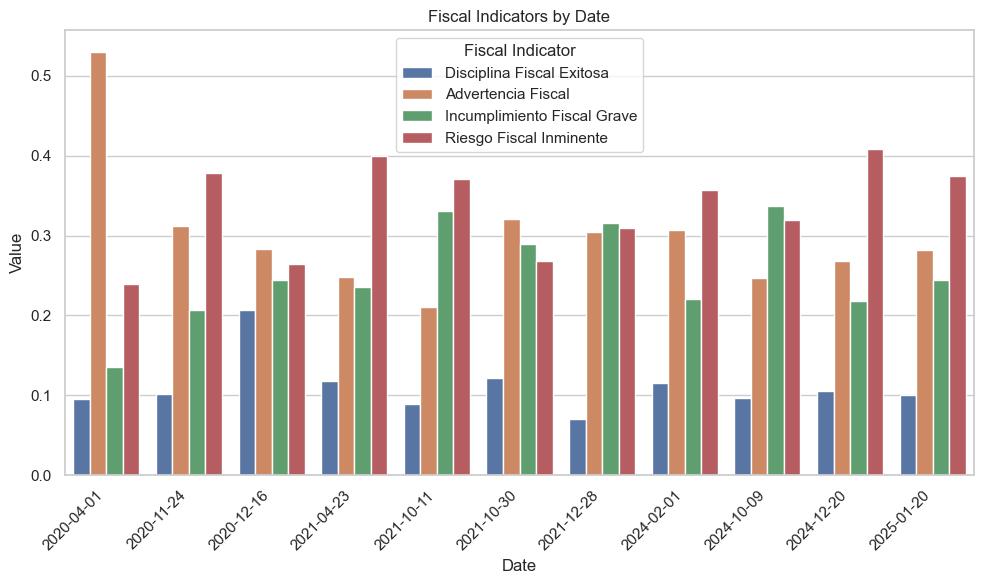

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'date' column is in datetime format
modified_sentiment_df['date'] = pd.to_datetime(modified_sentiment_df['date'])

# Sort the dataframe by date
modified_sentiment_df = modified_sentiment_df.sort_values(by="date")

# Melt the dataframe so that each row corresponds to one date and one value
df_melted = modified_sentiment_df.melt(id_vars=["date"], 
                                       value_vars=["Disciplina Fiscal Exitosa", 
                                                   "Advertencia Fiscal", 
                                                   "Incumplimiento Fiscal Grave", 
                                                   "Riesgo Fiscal Inminente"],
                                       var_name="Fiscal Indicator", 
                                       value_name="Value")

# Create the plot
plt.figure(figsize=(10, 6))

# Use seaborn barplot to plot the data
sns.barplot(x="date", y="Value", hue="Fiscal Indicator", data=df_melted)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Add titles and labels
plt.title('Fiscal Indicators by Date')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.tight_layout()
plt.show()


# Agenda

* Apply the same as above to the CF reports
* Test sentiment analysis using Fine-tuned and LLM
* Create a so-called “Fiscal Tone Index”.
* Explore correlations
* Visualize the data

### Brainstorming on "Fiscal Tone Index"

1. Assignment of numerical values to the sentiment labels.

In [ ]:
# Asignar un valor numérico a cada etiqueta de sentimiento
#sentiment_values = {
#    "Disciplina Fiscal Exitosa": 1,
#    "Advertencia Fiscal": 0,
#    "Incumplimiento Fiscal Grave": -1,
#    "Riesgo Fiscal Inminente": -2
#}

# Función para obtener el valor numérico de la etiqueta de sentimiento
#def get_sentiment_value(sentiment_label):
#    return sentiment_values.get(sentiment_label, 0)  # Devuelve 0 si no se encuentra la etiqueta


2. Modification of the analysis to add the numerical value of each sentiment:

In [ ]:
#def aggregate_sentiment_with_values(df):
#    aggregated_sentiment = []
#    
#    for filename, group in df.groupby('filename'):
#        # Obtener la etiqueta de sentimiento más frecuente
#        sentiments = group['sentiment'].apply(lambda x: x['labels'][x['scores'].index(max(x['scores']))])
#        
#        # Obtener los valores numéricos de las etiquetas de sentimiento
#        sentiment_values_list = [get_sentiment_value(sentiment) for sentiment in sentiments]
#        
#        # Calcular el índice de tono fiscal como la media de los valores numéricos
#        fiscal_tone_index = sum(sentiment_values_list) / len(sentiment_values_list) if sentiment_values_list else 0
#        
#        aggregated_sentiment.append({
#            'filename': filename,
#            'fiscal_tone_index': fiscal_tone_index  # Agregar el índice de tono fiscal
#        })
#    
#    return pd.DataFrame(aggregated_sentiment)


Finally, it calls the <code>aggregate_sentiment_with_values</code> function to calculate the fiscal tone index for each release.

In [ ]:
#aggregated_sentiment_df = aggregate_sentiment_with_values(df_cleaned)
#aggregated_sentiment_df

* Assignment of numeric values: We assign a numeric value to each sentiment label with the sentiment_values dictionary. This value reflects the “severity” of the sentiment (positive or negative).

* Calculation of the fiscal tone index: For each release (grouped by filename), we calculate the average of the numeric sentiment values of the paragraphs within that release. The fiscal tone index is calculated by summing the numeric values of all paragraphs and dividing by the number of paragraphs.

* Normalization (optional): If you want the index to be in a range from 0 to 100 or between -1 and 1, you can apply a normalization. For example, if you want the values to be between -1 and 1, you can use a formula like this:

In [ ]:
# normalized_index = (fiscal_tone_index - min_value) / (max_value - min_value) * 2 - 1